# Линейные алгоритмы. Переобучение и недообучение.

# Recap

## Задачи машинного обучения:

- С учителем: есть целевая переменная
- Без учителя: нет целевой переменной

## Задачи обучения с учителем:

- Регрессия: $ y \in \mathbb {R}$
- Классификация: $ y \in \mathbb {N}$

## Метрики качества регрессии


$$ MSE = \frac {1}{n} \sum{(\hat{y_i}- y_i)^2}$$
$$ RMSE = \frac {1}{n} \sqrt{\sum{\hat{y_i}- y_i)^2}}$$
$$ MAE = \frac {1}{n} \sum{|\hat{y_i}- y_i|}$$
$$ MAPE = \frac {1}{n} \sum |{\frac{\hat{y_i}- y_i}{y_i}}|$$
$$R^2 = 1- \frac{\sum{(\hat{y_i}- y_i)^2}}{\sum{(y_i - \overline{y})^2}}$$


## Метрики классификации

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

$$ Recall = \frac{TP}{TP + FN}$$

$$ Precision = \frac{TP}{TP + FP}$$

$$ F1 = \frac{2PR}{R + P}$$

$$ROC-AUC-кривая $$
$FPR = \frac{FP}{FP + TN}$
$TPR = \frac{TP}{TP + FN}$


## Хвост с прошлого урока: ROC-кривая


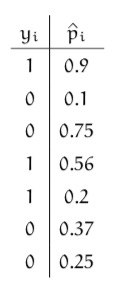

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
y = [1, 0, 0, 1, 1, 0, 0]
y_proba = [0.9, 0.1, 0.75, 0.56, 0.2, 0.37, 0.25]

In [2]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns

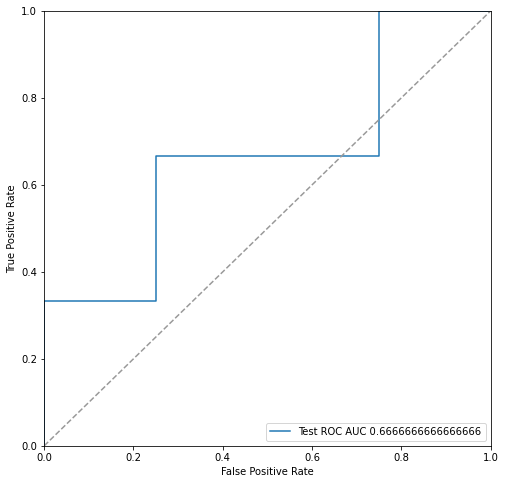

0.6666666666666666


In [4]:
plt.figure(figsize = (8, 8))
plt.plot(fpr, tpr, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

print(roc_auc_test)

In [9]:
import pandas as pd
import numpy as np

In [11]:
data = pd.DataFrame([y, y_proba], index=['y', 'y_proba']).T.sort_values(by='y_proba', ascending=False)
data

y  y_proba
0  1.0     0.90
2  0.0     0.75
3  1.0     0.56
5  0.0     0.37
6  0.0     0.25
4  1.0     0.20
1  0.0     0.10

# Немножко теории перед моделированием

**Модель - не гадалка**

**Узнать, на сколько ошибаются модели, после их продуктивизации - дорогое удовольствие**

## Отложенная выборка

Данные разделяют на две части: обучающую (train) и тестовую (test)

На тренировочной части обучаются и валидируется модель. 
На тестовой части проверяется качество **_уже обученной_** модели

Соотношения: 80/20, 70/30, 67.(6) / 33.(3)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
data_train, data_test = train_test_split(data, test_size=0.2, shuffle=True, stratify=None)

# если X и y хранятся в отдельных переменных, можно так
# X = data.drop('target', axis=1)
# y = data['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Много отложенных выборок

Данные разделяют на две части: обучающую (train) и тестовую (test)

Так делают **несколько раз**

## Кросс-валидация

<img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png'>

In [14]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
# model = LinearRegression()
# cross_val =  cross_val_score(model, X, y, scoring=None, cv=5)

# Линейные алгоритмы

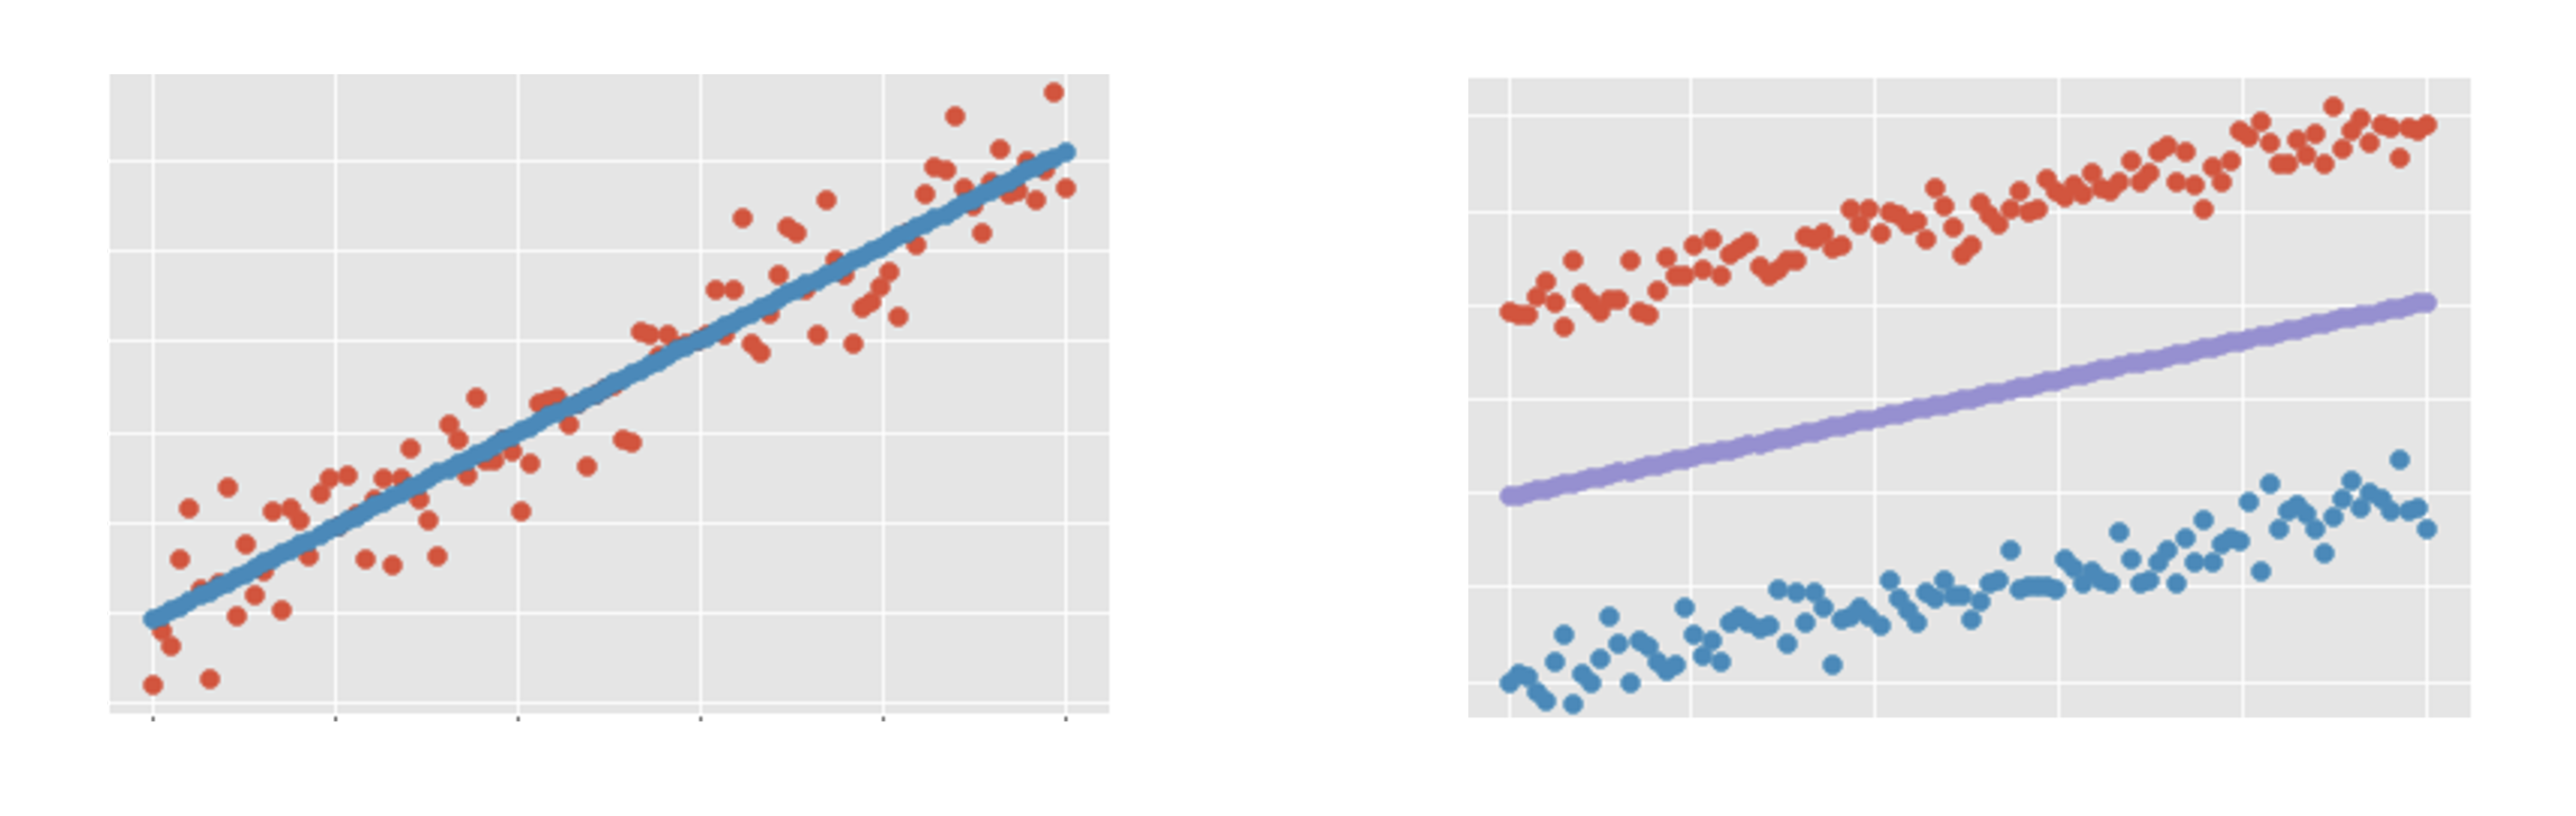

## Линейная регрессия

Восстанавливаемая модель имеет вид
$$ a(x)= w_0 + w_1x_1 + ... + w_nx_n$$

И тогда можно получить прогнозы: 

$$ \hat{y} = \hat{w_0} + \hat{w_1}x_1 + ... + \hat{w_n}x_n$$

Параметры $w_0, w_1, ..., w_n$ не известны.

Но теория говорит, что мы найдем наилучшие оценки параметров, если оптимизирует вот такую функцию:

$$ min{\sum{(y_i - \hat{y_i})^2}} $$

$$ min{\sum{(y_i - \hat{y_i})^2}} = min{\sum{(y_i - w_0 - w_1x_1 - ... - w_nx_n)^2}} $$

Или в матричной нотации:

$$ min(y - Xw)^2 $$


Существует аналитическое решение:

$$ w = (X^TX)^{-1}X^Ty$$

2 неочевидные проблемы:

- Поиск $(X^TX)^{-1}$ имеет кубическую сложность

- $(X^TX)^{-1}$ может быть вырождена или иметь плохую обусловленность

Побеждает все движение - градиентный спуск, но о нем чуть позже

In [ ]:
# Обучаем линейную модель

In [59]:
df = pd.read_csv('kc_house_data.csv')
df.drop(['id', 'date'], axis=1, inplace=True)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7      1180.0              0      1955             0   
1     0          3      7      2170.0            400      1951          1991   
2     0          3      6       770.0              0      1933             0   
3     0          5      7      1050.0            910      1965             0   
4     0          3      8      1680.0              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [60]:
null_table = df.isnull().sum()
null_table[null_table > 0]

sqft_above    2
dtype: int64

### Кратчайшая предобработка данных

In [61]:
var_cat = ['view', 'zipcode', 'condition', 'grade', 'waterfront']
var_real = list(set(df.columns) - set(var_cat))


df[var_cat] = df[var_cat].astype(str)

df = pd.get_dummies(df, drop_first=True)

In [62]:
df["sqft_above"].fillna(1788.39,inplace=True)

### А отсюда начнется тру-мл

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [65]:
X = df.drop('price', axis=1)
y = df['price']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(17290, 102) (4323, 102)
(17290,) (4323,)


In [67]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = model_lr.predict(X_test)
print(mae(y_test, y_pred))
print(np.mean(y_test))

88038.67401844852
533879.9437890354


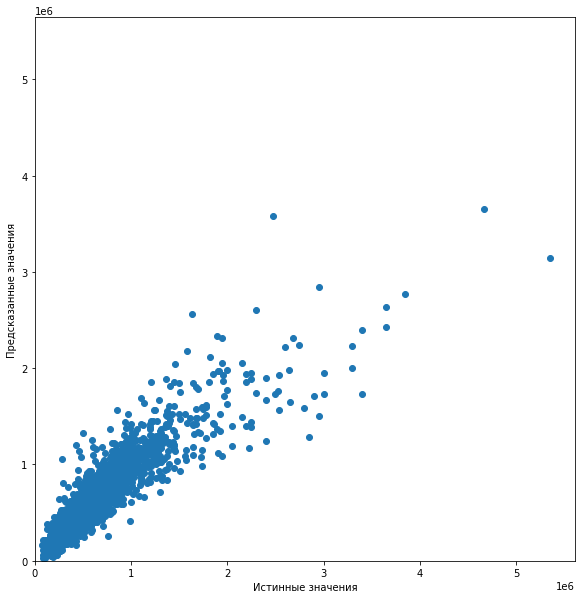

In [69]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [70]:
model = LinearRegression()

mae_val = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(-1*mae_val)
print('Среднее значение ошибки:', np.mean(-1*mae_val))
print('Стандартное отклонение ошибки:', np.std(-1*mae_val))

[8.81410790e+04 1.55320738e+10 9.20758629e+04 8.76284655e+04
 8.84935099e+04]
Среднее значение ошибки: 3106486025.8588877
Стандартное отклонение ошибки: 6212793882.259333


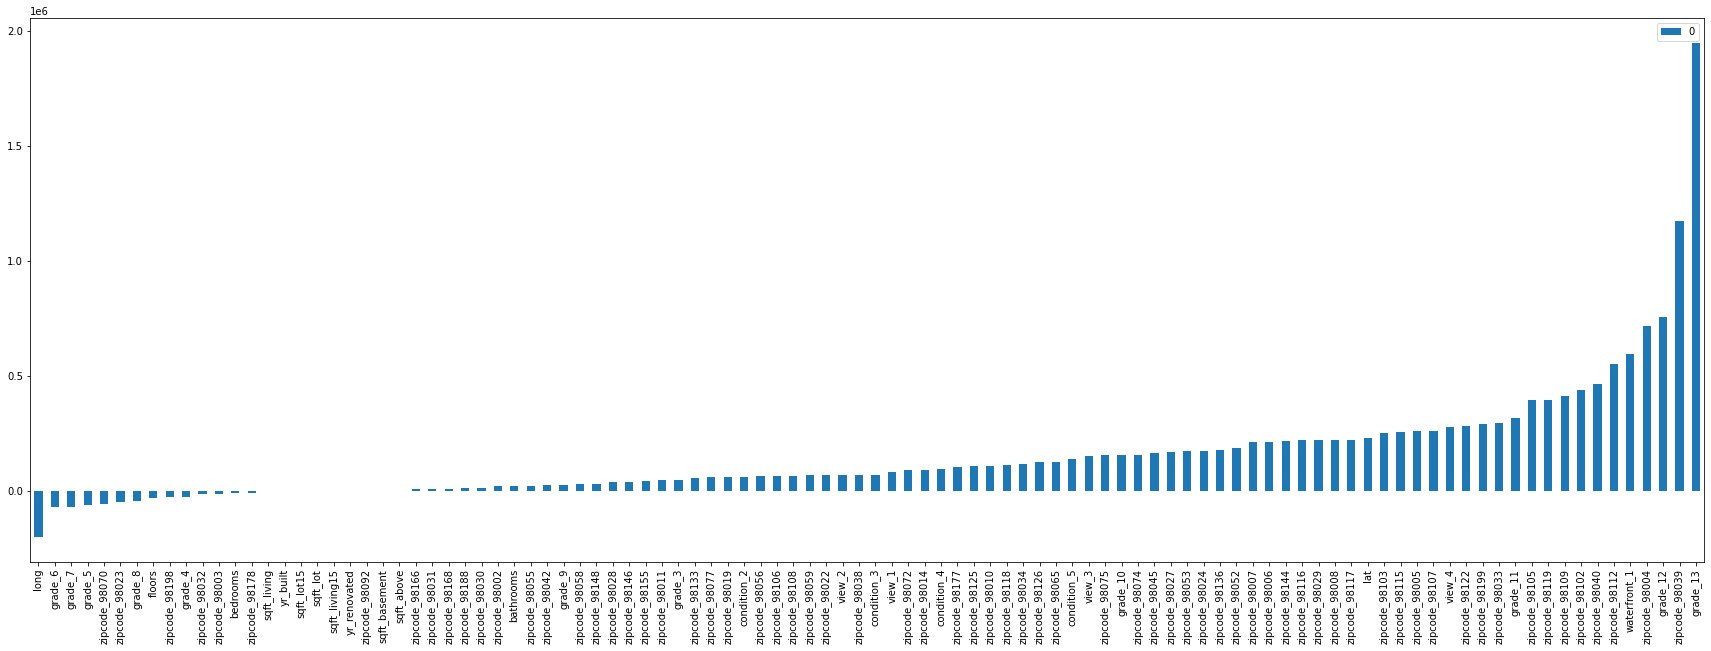

In [73]:
coefs = model_lr.coef_

features = list(df.drop('price', axis=1).columns)
df_coef = pd.DataFrame(coefs, features)
df_coef.sort_values(0).plot(kind='bar', figsize=(30, 10));

## Регуляризация

<img src='https://server.179.ru/tasks/python/2022b/images/ai/ai18.png'>

<img src='https://server.179.ru/tasks/python/2022b/images/ai/ai17.png'>

Регуляризация - одна из мер в борьбе с переобучением. 

Она добавляет штраф на веса при усложении моделей.

В ходу два типа регуляризации:

- *L1*: $ \alpha \sum{|w_i|}$
- *L2*: $ \alpha \sum{w_i^2}$


Регрессия с L1-регуляризаций, т.е. 
$ min{\sum{(y_i - w_0 - w_1x_1 - ... - w_nx_n)^2} + \alpha \sum{|w_i|}} $  называется Lasso-регрессией


Регрессия с L2-регуляризаций, т.е. 
$ min{\sum{(y_i - w_0 - w_1x_1 - ... - w_nx_n)^2} + \alpha \sum{(w_i)^2}} $  называется Ridge-регрессией


In [75]:
from sklearn.linear_model import Ridge, Lasso

In [80]:
model_ridge = Ridge(alpha=10)

model_ridge.fit(X_train, y_train)

y_pred_ridge = model_ridge.predict(X_test)
print(mae(y_test, y_pred_ridge))

88835.97362244604


## Логистическая регрессия

Теория по этому блоку в презентации

In [81]:
df = pd.read_csv('telecom_churn.csv')

In [82]:
var_cat = ['State', 'Area code', 'International plan', 'Voice mail plan']

var_real = ['Number vmail messages', 'Total day minutes',
            'Total day calls', 'Total day charge', 'Total eve minutes',
            'Total eve calls', 'Total eve charge', 'Total night minutes',
            'Total night calls', 'Total night charge', 'Total intl minutes',
            'Total intl calls', 'Total intl charge', 
            'Customer service calls', 'Account length']


df[var_cat] = df[var_cat].astype('object')
df = pd.get_dummies(df, drop_first=True)
df.head()

Account length  Number vmail messages  Total day minutes  Total day calls  \
0             128                     25              265.1              110   
1             107                     26              161.6              123   
2             137                      0              243.4              114   
3              84                      0              299.4               71   
4              75                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  ...  State_VA  State_VT  State_WA  \
0                244.7                 91  ...         0         0         0   
1                254.4                103  ...         0         0         0   
2                162.6                104  ...         0         0         0   
3                196.9                 89  ...         0         0         0   
4                186.9                121  ...         0         0         0   

   State_WI  State_WV  State_WY  Area code_415  Area code_510  \
0         0         0         0              1              0   
1         0         0         0              1              0   
2         0         0         0              1              0   
3         0         0         0              0              0   
4         0         0         0              1              0   

   International plan_Yes  Voice mail plan_Yes  
0                       0                    1  
1                       0                    1  
2                       0                    0  
3                       1                    0  
4                       1                    0  

[5 rows x 70 columns]

In [83]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [85]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['Churn'])

In [88]:
model_logreg = LogisticRegression()

model_logreg.fit(X_train, y_train)

/Users/elentevanyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
y_pred_proba = model_logreg.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_proba[:, 1]))

0.7292457948996202


In [90]:
y_pred_logreg = model_logreg.predict(X_test)
print(roc_auc_score(y_test, y_pred_logreg))

0.5256646771568095
